# Step 1: Install Requirements

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.45 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (10746/10746), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

RuntimeError: ignored

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="M72bFYWEkF9Z49IPX9jT")
project = rf.workspace("project-nsi8j").project("project-dhqyt")
dataset = project.version(5).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/project-5 in yolov5pytorch:: 100%|██████████| 270/270 [00:00<00:00, 653.33it/s]


In [ ]:
!python train.py --img 1024 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache --patience 0

train: weights=yolov5s.pt, cfg=, data=/content/datasets/project-5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=0, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# !python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.25 --source {dataset.location}/test/images

In [ ]:
# also saves probability
!python detect.py --weights runs/train/exp/weights/best.pt --img 1024 --conf 0.25 --source {dataset.location}/test/images  --save-txt   --save-conf

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/project-5/test/images, data=data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /usr/local/lib/python3.10/dist-packages/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-168-gec2b853 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/9 /content/datasets/project-5/test/images/frame29.jpg: 576x1024 5 notprojectors, 2 projectors, 47.7ms
image 2/9 /content/datasets/project-5/test/images/frame8.jpg: 576x1024 4 notprojectors, 2 projectors, 14.0ms
image 3/9 /

# **Explanation of below code**

I have sorted all txt files containing information according to bounding boxes coordinates , class and probability in dataframes and all dataframes are **sorted** according to **xmax coordinates** of bounding boxes and all dataframes are stored in **all_data named dictionary** .

Then i have taken any dataframe which have all values and given identification number to each set of coordinates and stores it in comparision list **comp** for different students and then added column of identification named **identify** in all dataframes by assigning values close to nearest tupple of coordinates present in comp list to each dataframe.

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
# assign directory
directory = '/content/labels'

# iterate over files in
# that directory
files = Path(directory).glob('*')
files=sorted(files)
a=len(files)
print(a)

all_data={}
prob_arrays=[[]*5]
k=0;
for fil in files:
  data = pd.read_csv(fil,sep=' ',names=['class','xmax','ymax','xmin','ymin','probability'])
  # x=(data.iloc[:,1:2].sum(axis=1)+data.iloc[:,3:4].sum(axis=1))/0.2
  data['Sum'] = np.stack([data['xmax'], data['ymax'], data['xmin'],data['ymin']], axis=1).tolist()
  # data['Sum']=round(x,3)
  data= data.sort_values(by=['Sum'], ascending=True)
  all_data[k]=data

  k=k+1

print(prob_arrays)

comp= all_data[(a+1)/2]['Sum']
# box=[comp['xmax'],comp['ymax'],comp['xmin'],comp['ymin']]
np.sort(comp)



for i in range(len(all_data)):
  col=[]

  for num in all_data[i]['Sum']:
    target_tuple = num
    tuple_list = comp

    index = min(range(len(tuple_list)), key=lambda i: sum((a - b) ** 2 for a, b in zip(target_tuple, tuple_list[i])))
    #getting most similar tupples
    # index=np.where(abs(comp-num)<0.1)[0]
    # index=np.where(min(comp-num))[0][0]
    # if(len(index)>0):
    #   ind=index[0]
    col.append(index)
  all_data[i]['identify']=col

comp
# y_student=[[]*10]
# for i in range(8):
#   # y_label=[]

#   for val in all_data[i]['identify']:

#     y_student[i].append(all_data[i]['identify'][i])
#     # y_label.append(np.array(data.columns)[0])

#   # y_student.append(y_label)


# print(y_student)

7


4    [0.128418, 0.327823, 0.0537109, 0.0862903]
0    [0.412842, 0.458468, 0.0668945, 0.0879032]
1     [0.434326, 0.502823, 0.0825195, 0.123387]
3     [0.496094, 0.459274, 0.0761719, 0.105645]
7      [0.498535, 0.687097, 0.118164, 0.224194]
2     [0.610596, 0.478629, 0.0854492, 0.121774]
9      [0.677246, 0.680242, 0.124023, 0.192742]
5       [0.762451, 0.519758, 0.10791, 0.133065]
8       [0.834229, 0.670968, 0.115723, 0.18871]
6     [0.963379, 0.654032, 0.0732422, 0.209677]
Name: Sum, dtype: object

In [ ]:
# for vedio 1

import pandas as pd
from pathlib import Path
import numpy as np
# assign directory
directory = '/content/labels'

def find(arr, value, threshold):
    diff = np.abs(arr - value)
    within_threshold = diff <= threshold
    if not np.any(within_threshold):
        return -1
    closest_idx = np.argmin(diff[within_threshold])
    original_idx = np.where(within_threshold)[0][closest_idx]
    return original_idx

# iterate over files in
# that directory
files = Path(directory).glob('*')
files=sorted(files)
a=len(files)
print(a)

all_data={}
thresh=0.1
prob_arrays = [[] for i in range(5)]
arr=np.array([0.25,0.33,0.69,0.51,0.75])
k=0;
for fil in files:
  data = pd.read_csv(fil,sep=' ',names=['class','xmax','ymax','xmin','ymin','probability'])
  # x=(data.iloc[:,1:2].sum(axis=1)+data.iloc[:,3:4].sum(axis=1))/0.2
  # data['Sum'] = np.stack([data['xmax'], data['ymax'], data['xmin'],data['ymin']], axis=1).tolist()
  # data['Sum']=round(x,3)
  data= data.sort_values(by=['xmax'], ascending=True)
  data['xmax']=data['xmax'].round(2)
  dic={}
  for i in range(len(data['xmax'])):
    if data['xmax'][i] in dic and dic[data['xmax'][i]][2]==0:
      dic[data['xmax'][i]]=(i,data['probability'][i],data['class'][i])
    elif data['xmax'][i] in dic and dic[data['xmax'][i]][2]==1:
      pass
    else:
      dic[data['xmax'][i]]=((i,data['probability'][i],data['class'][i]))

  for m in dic:
    ink=find(arr,m,thresh)
    if(ink!=-1):
      if(dic[m][2]==1):
        prob_arrays[ink].append(dic[m][1])
      else:
        if(len(prob_arrays[ink])==0):
          prob_arrays[ink].append(0.75)
        else:
          prob_arrays[ink].append(prob_arrays[ink][-1])


  # l=len(data['probability'])
  # i=0
  # for val in range(l):
  #   if(l>=5 and val<5):
  #     if data['class'][val]==1:
  #      prob_arrays[val].append(data['probability'][val])
  #     else:
  #       if(len(prob_arrays[val])==0):
  #         prob_arrays[val].append(0.75)
  #       else:
  #         prob_arrays[val].append(prob_arrays[val][-1])

  #   elif l==4:
  #     if data['class'][val]==1:
  #      prob_arrays[val].append(data['probability'][val])
  #     else:
  #       if(len(prob_arrays[val])==0):
  #         prob_arrays[val].append(0.75)
  #       else:
  #         prob_arrays[val].append(prob_arrays[val][-1])
  #     if(val==3):
  #       prob_arrays[4].append(0.75)

print(len(prob_arrays[4]))

600
556


In [ ]:
# for vedio 2

import pandas as pd
from pathlib import Path
import numpy as np
# assign directory
directory = '/content/labels2'

def find(arr, value, threshold):
    diff = np.abs(arr - value)
    within_threshold = diff <= threshold
    if not np.any(within_threshold):
        return -1
    closest_idx = np.argmin(diff[within_threshold])
    original_idx = np.where(within_threshold)[0][closest_idx]
    return original_idx

# iterate over files in
# that directory
files = Path(directory).glob('*')
files=sorted(files)
a=len(files)
print(a)

all_data={}
thresh=0.1
prob_arrays2 = [[] for i in range(4)]
arr=np.array([0.38,0.50,0.69,0.71])
k=0;
for fil in files:
  data = pd.read_csv(fil,sep=' ',names=['class','xmax','ymax','xmin','ymin','probability'])
  # x=(data.iloc[:,1:2].sum(axis=1)+data.iloc[:,3:4].sum(axis=1))/0.2
  # data['Sum'] = np.stack([data['xmax'], data['ymax'], data['xmin'],data['ymin']], axis=1).tolist()
  # data['Sum']=round(x,3)
  data= data.sort_values(by=['xmax'], ascending=True)
  data['xmax']=data['xmax'].round(2)
  dic={}
  for i in range(len(data['xmax'])):
    if data['xmax'][i] in dic and dic[data['xmax'][i]][2]==0:
      dic[data['xmax'][i]]=(i,data['probability'][i],data['class'][i])
    elif data['xmax'][i] in dic and dic[data['xmax'][i]][2]==1:
      pass
    else:
      dic[data['xmax'][i]]=((i,data['probability'][i],data['class'][i]))

  for m in dic:
    ink=find(arr,m,thresh)
    if(ink!=-1):
      if(dic[m][2]==1):
        prob_arrays2[ink].append(dic[m][1])
      else:
        if(len(prob_arrays2[ink])==0):
          prob_arrays2[ink].append(0.75)
        else:
          prob_arrays2[ink].append(prob_arrays2[ink][-1])


  # l=len(data['probability'])
  # i=0
  # for val in range(l):
  #   if(l>=5 and val<5):
  #     if data['class'][val]==1:
  #      prob_arrays[val].append(data['probability'][val])
  #     else:
  #       if(len(prob_arrays[val])==0):
  #         prob_arrays[val].append(0.75)
  #       else:
  #         prob_arrays[val].append(prob_arrays[val][-1])

  #   elif l==4:
  #     if data['class'][val]==1:
  #      prob_arrays[val].append(data['probability'][val])
  #     else:
  #       if(len(prob_arrays[val])==0):
  #         prob_arrays[val].append(0.75)
  #       else:
  #         prob_arrays[val].append(prob_arrays[val][-1])
  #     if(val==3):
  #       prob_arrays[4].append(0.75)

print(len(prob_arrays2[3]))

751
657


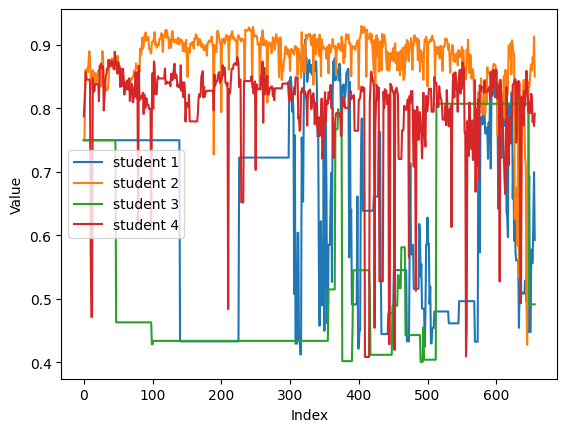

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

arr_tuple=prob_arrays2

# Find the minimum length of the 5 arrays
min_len = min(len(arr_tuple[0]), len(arr_tuple[1]), len(arr_tuple[2]), len(arr_tuple[3]))

# Create an array of indices to use for plotting
indices = np.arange(min_len)

# Plot the 5 arrays with the minimum index only
plt.plot(indices, arr_tuple[0][:min_len])
plt.plot(indices, arr_tuple[1][:min_len])
plt.plot(indices, arr_tuple[2][:min_len])
plt.plot(indices, arr_tuple[3][:min_len])

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['student 1', 'student 2', 'student 3', 'student 4'])

# Show the plot
plt.show()


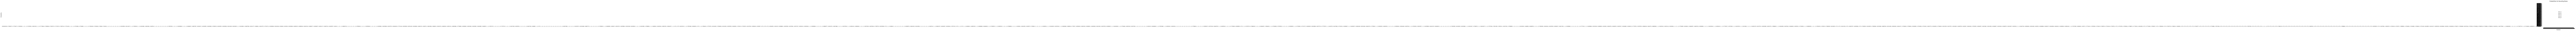

In [ ]:
import matplotlib.pyplot as plt
x_values = [i for i in range(len(prob_arrays[0]))]

# Iterate over each array in prob_arrays and plot the values
for i in range(len(prob_arrays)):
  plt.plot(np.array([str(val) for val in x_values]), np.array([str(val) for val in prob_arrays[i]]), label=f'Array {i+1}')

# Add the title, x-axis label, and legend
plt.title('Probabilities for Bounding Boxes')
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.legend()

# Display the plot
plt.show()

In [ ]:
all_data

All values of class that is student seeing projector or not is stored in **y_student** such that ith index of y_student contain list of values for ith student



In [ ]:
y_student=[[] for i in range(10)]
for i in range(a):
  # y_label=[]
  for j in range(len(all_data[i]['identify'])):
    y_student[all_data[i]['identify'][j]].append(all_data[i]['class'][j])

    # y_label.append(np.array(data.columns)[0])

  # y_student.append(y_label)


print(y_student)

[[1, 1, 1, 0, 1, 1, 1, 1], [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1]]


**Code below plots the graph for each student**

*   0-non-projector
*   1-projector

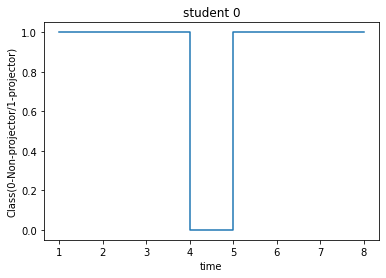

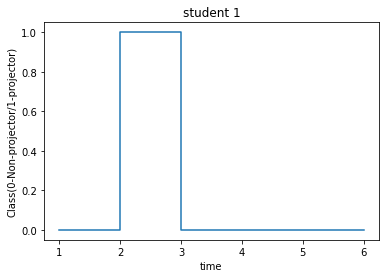

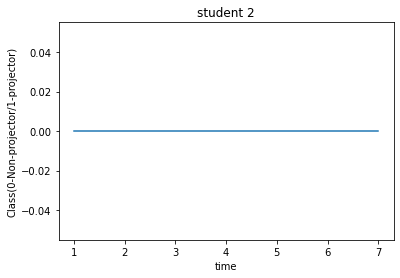

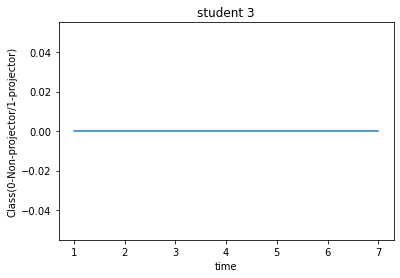

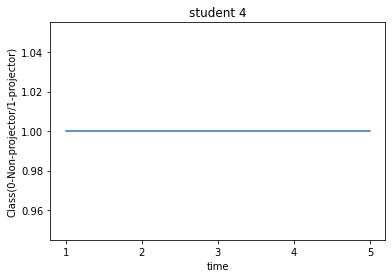

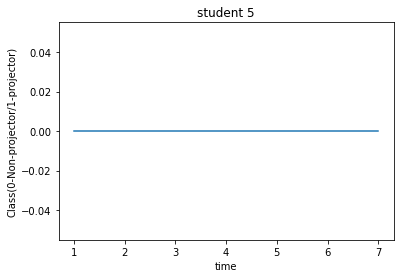

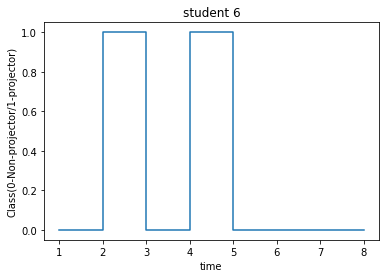

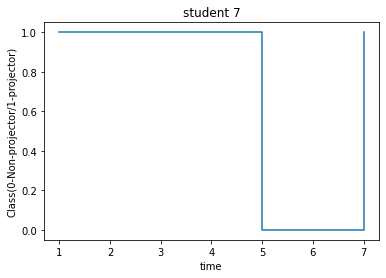

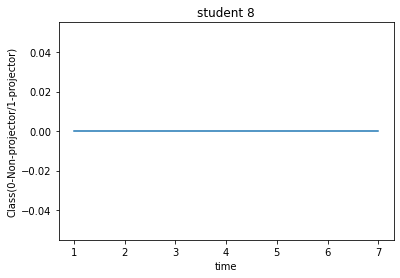

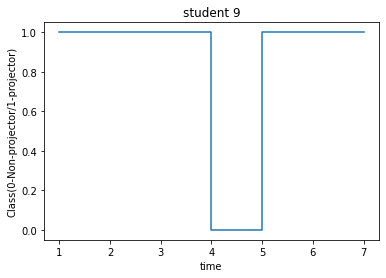

In [ ]:
from matplotlib import legend
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.figure(2)
for i in range (len(y_student)):

  plt.title(f'student {i}')
  size=len(y_student[i])
  x=[0]*size
  for j in range (size):
      x[j]=j+1
  plt.xticks(x)
  plt.xlabel('time')
  plt.ylabel('Class(0-Non-projector/1-projector)')

  plt.step(x,y_student[i], where='post')
  plt.show()



In [ ]:
# # # Model - we will use yolov5s
# import torch
# model = torch.hub.load('.', 'custom', 'yolov5s.pt', source='local')

# # # Image
# img = '/content/yolov5/runs/detect/exp4/frame_583_png.rf.b069bda2f952b311d4c007f5e6fbbc65.jpg'

# # Inference
# results = model(img) # pass the image through our model

# results.pandas().xyxy[0] # return the predictions as a pandas dataframe

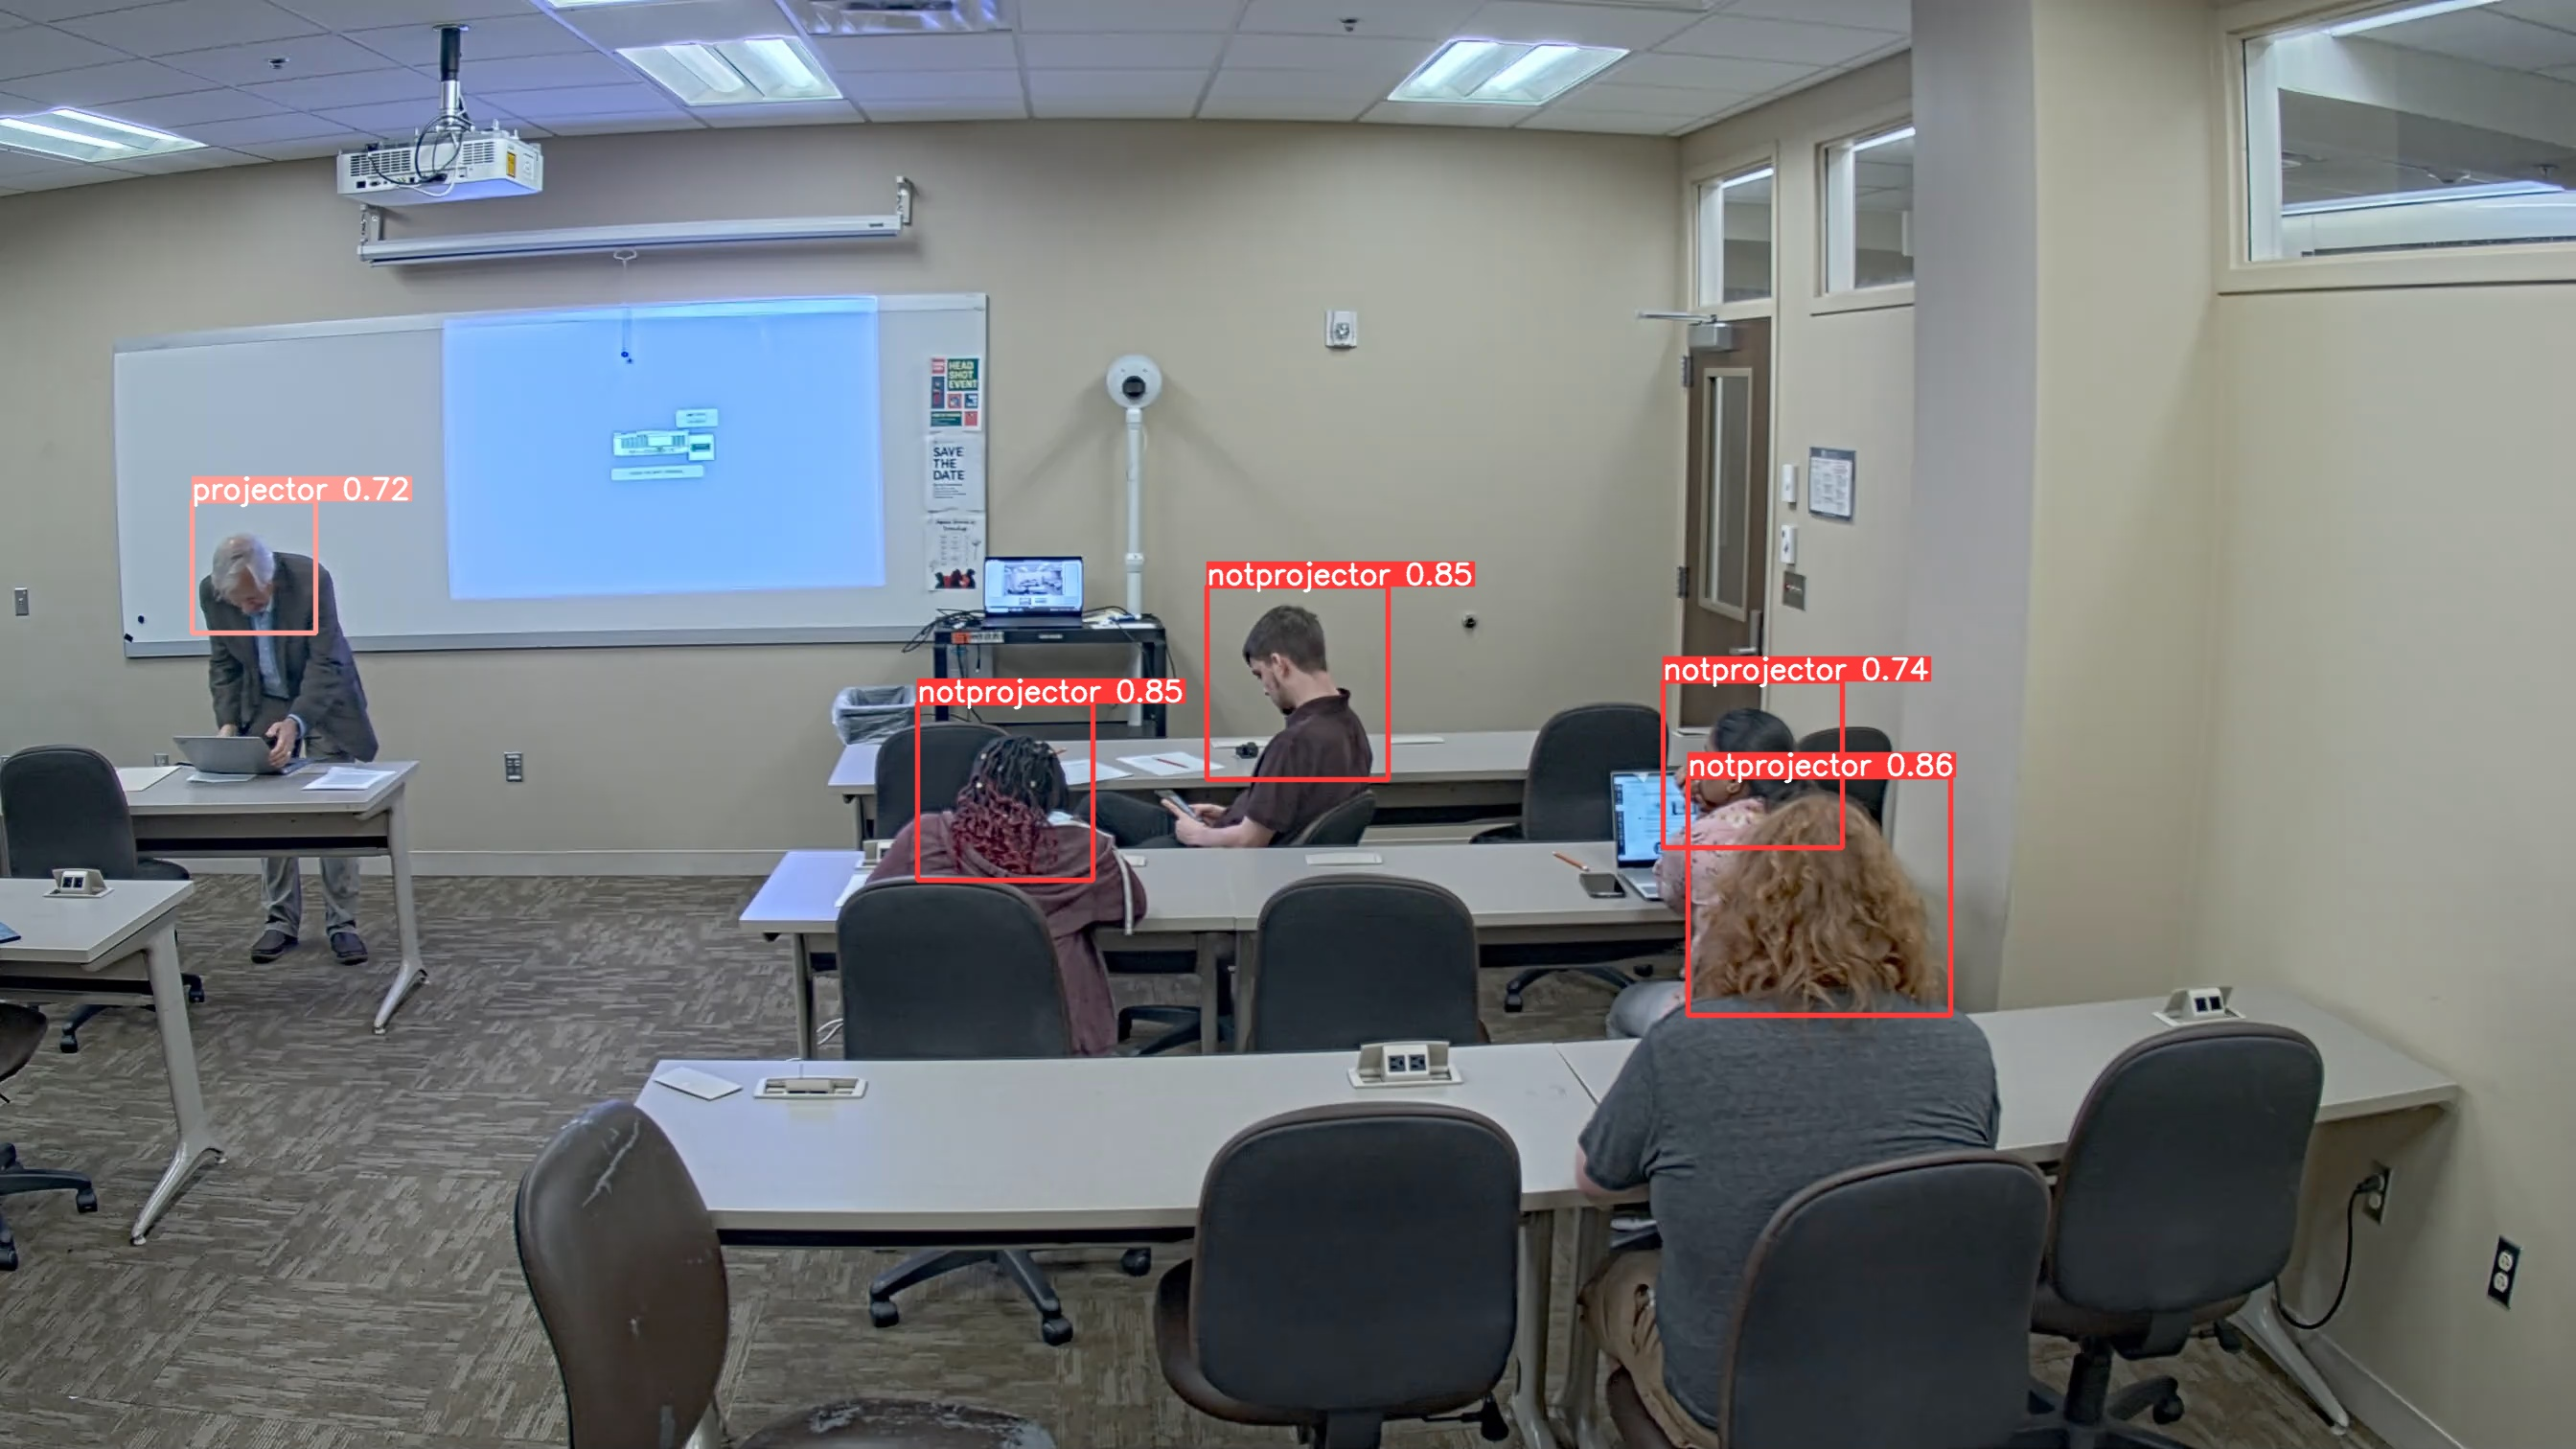

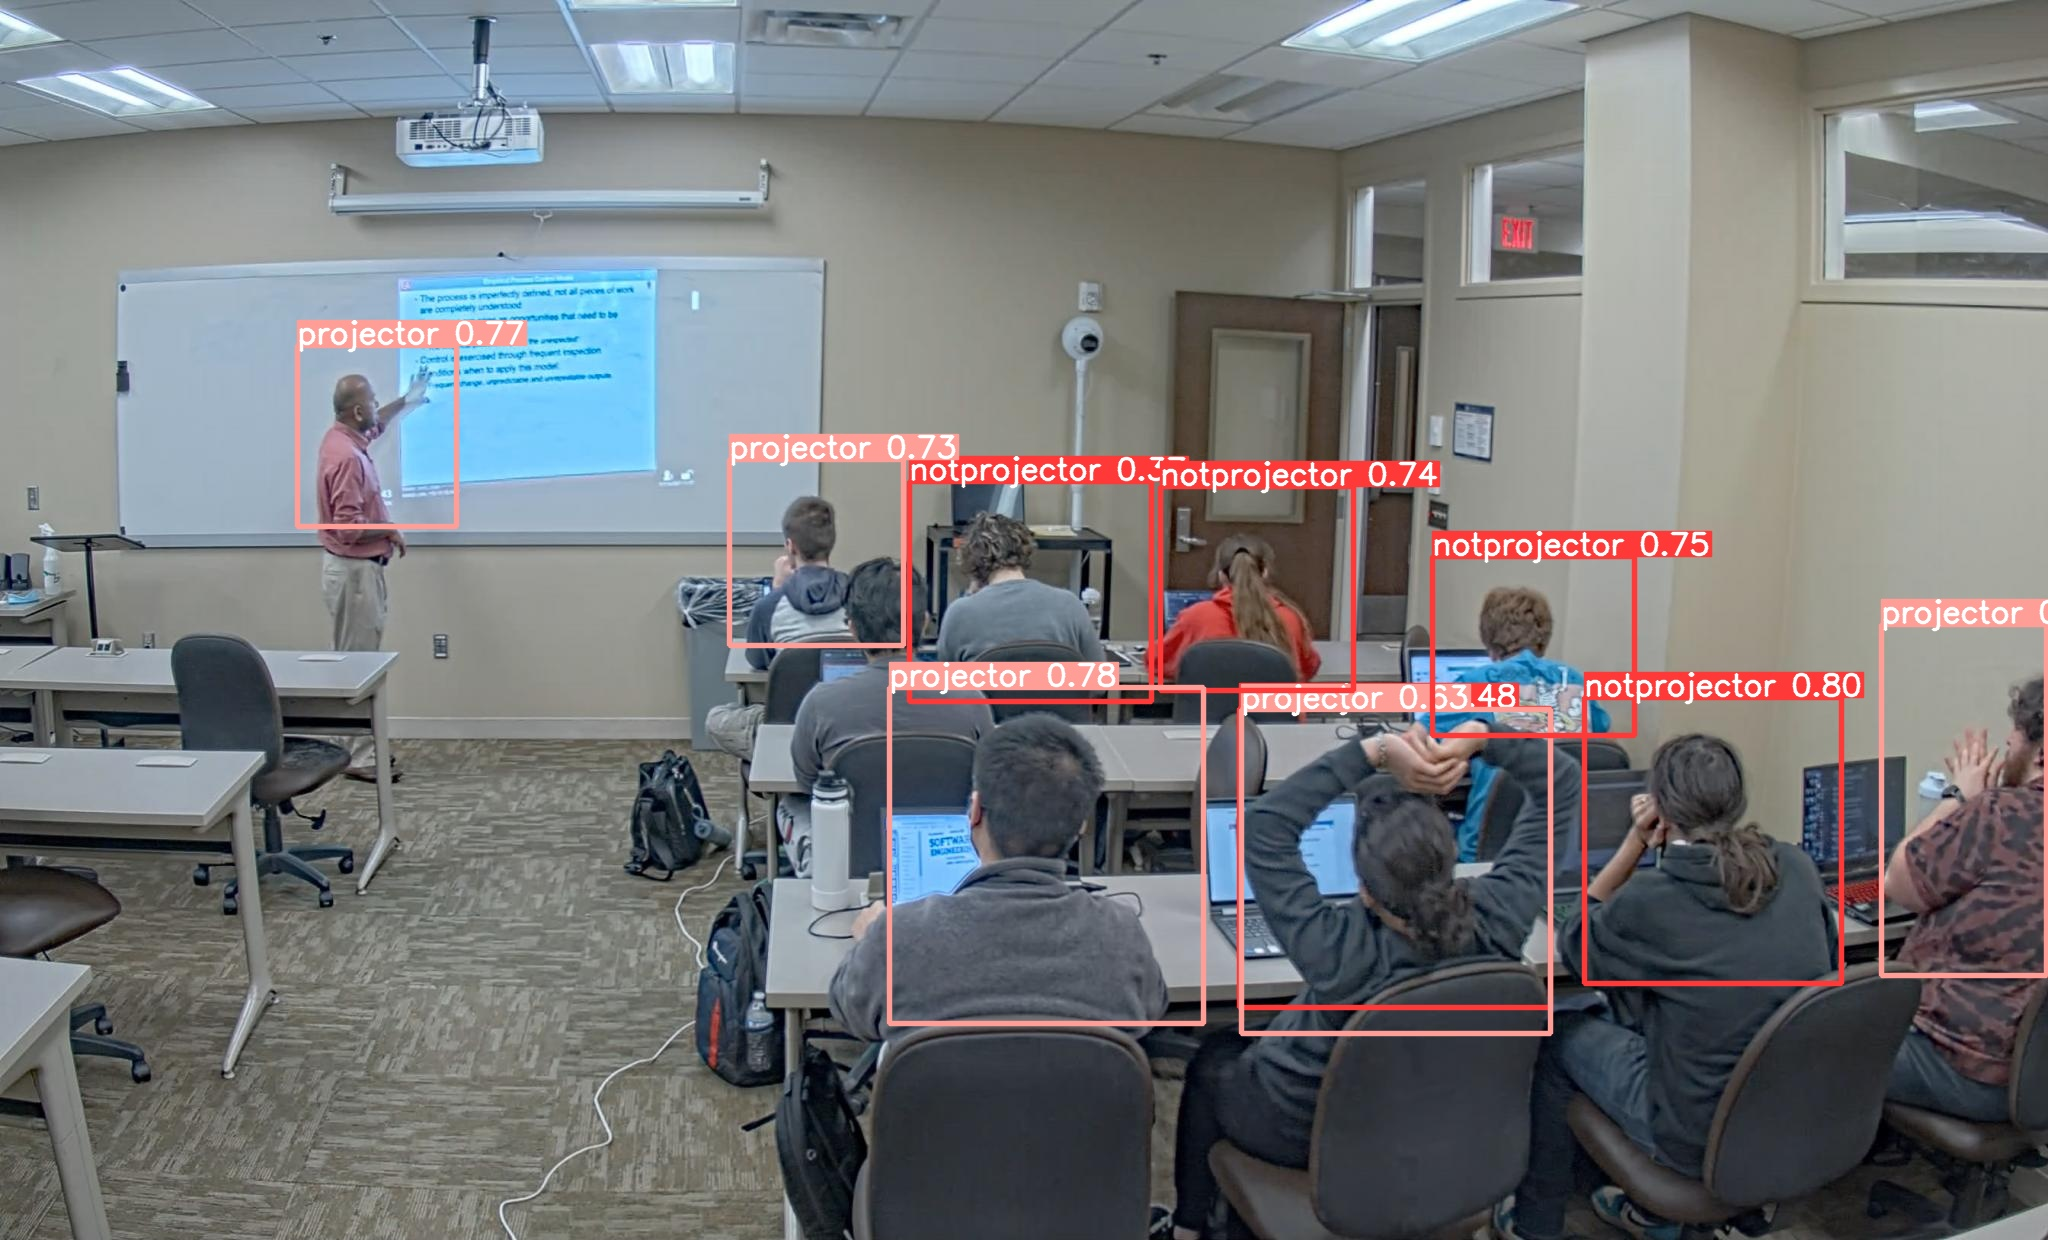

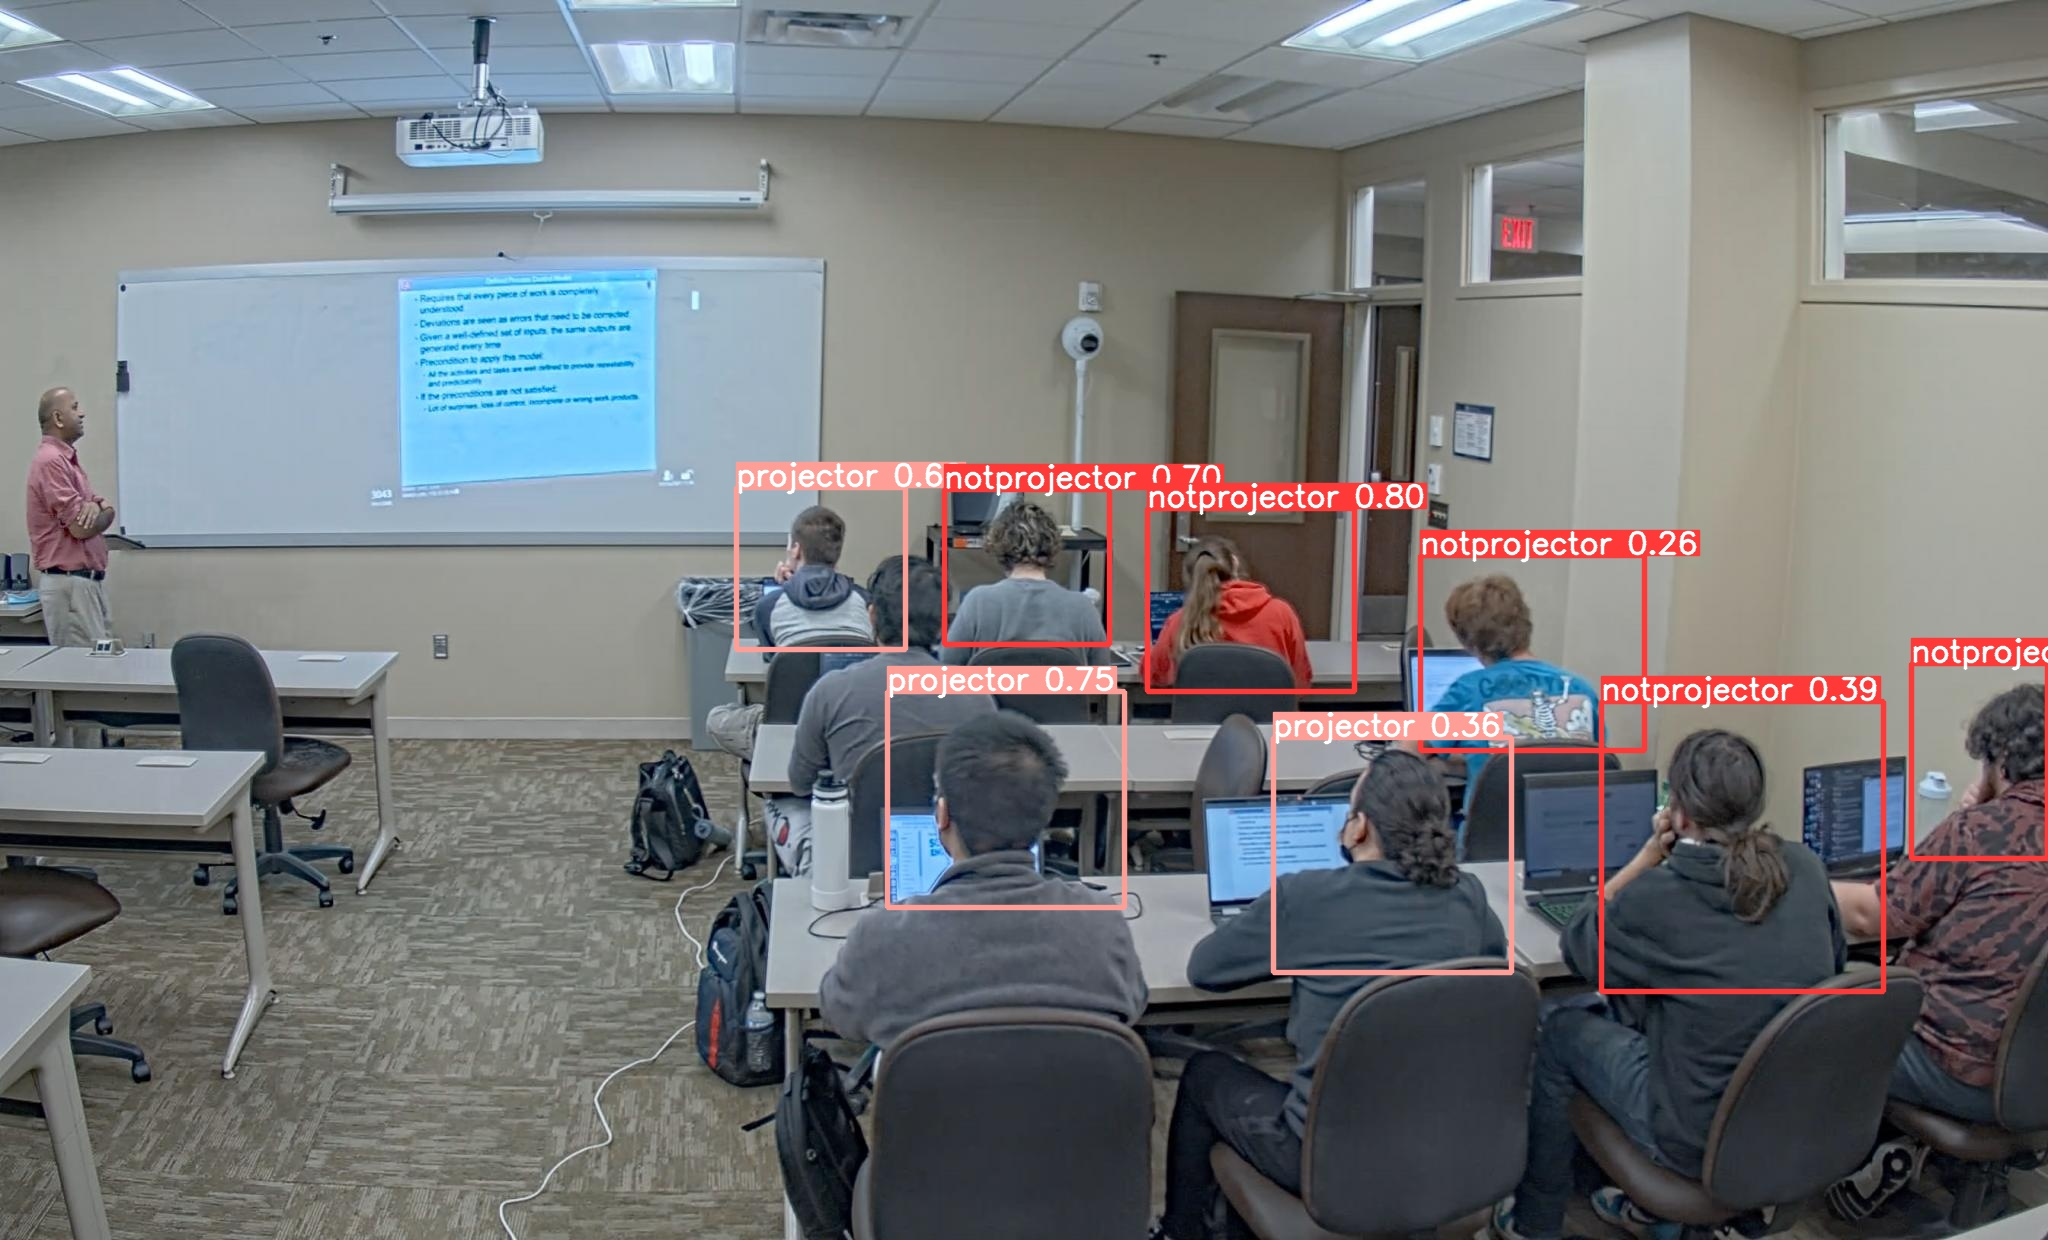

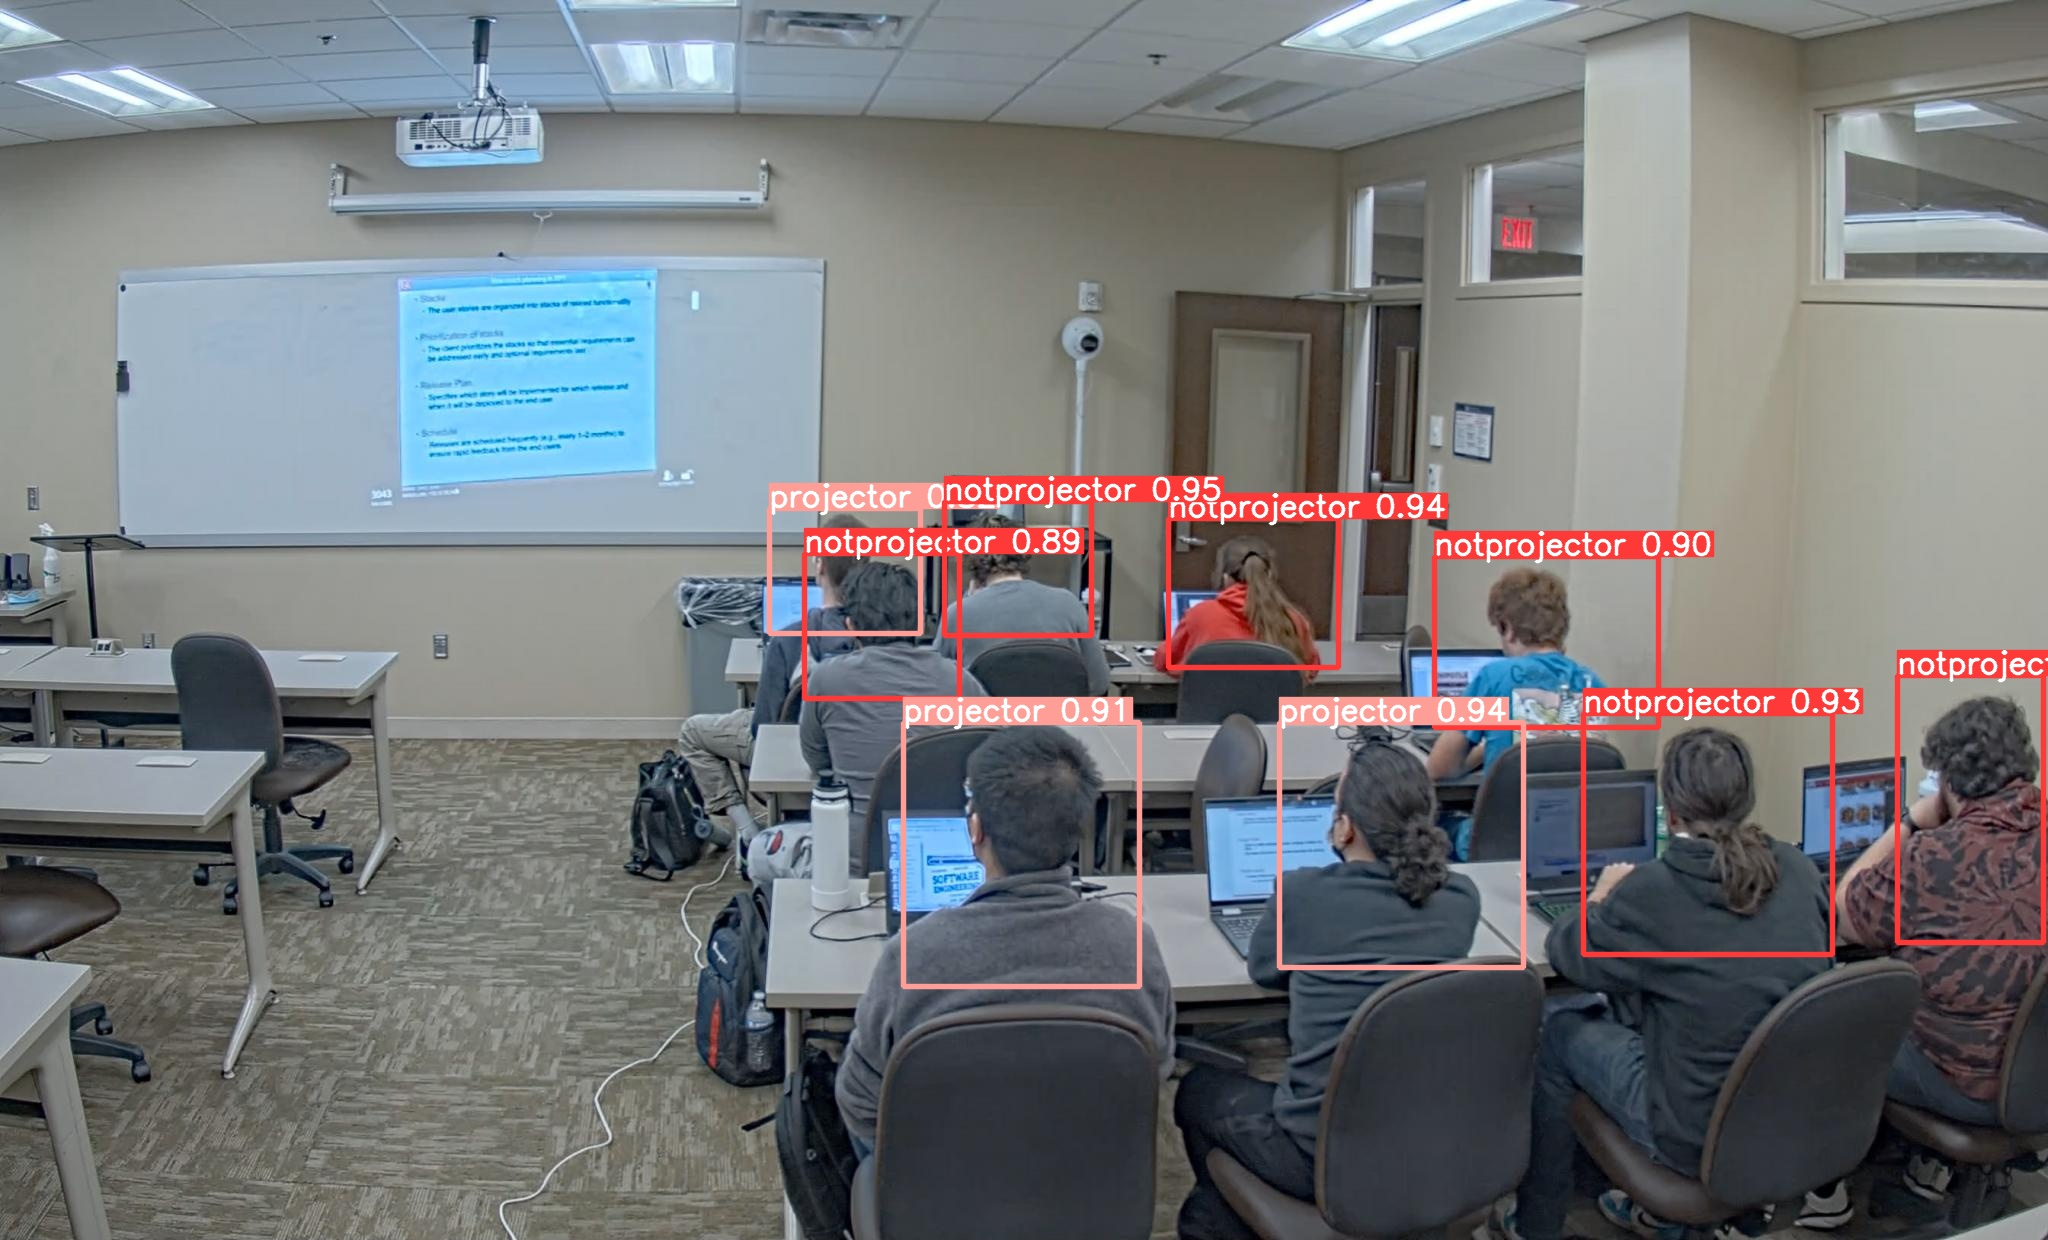

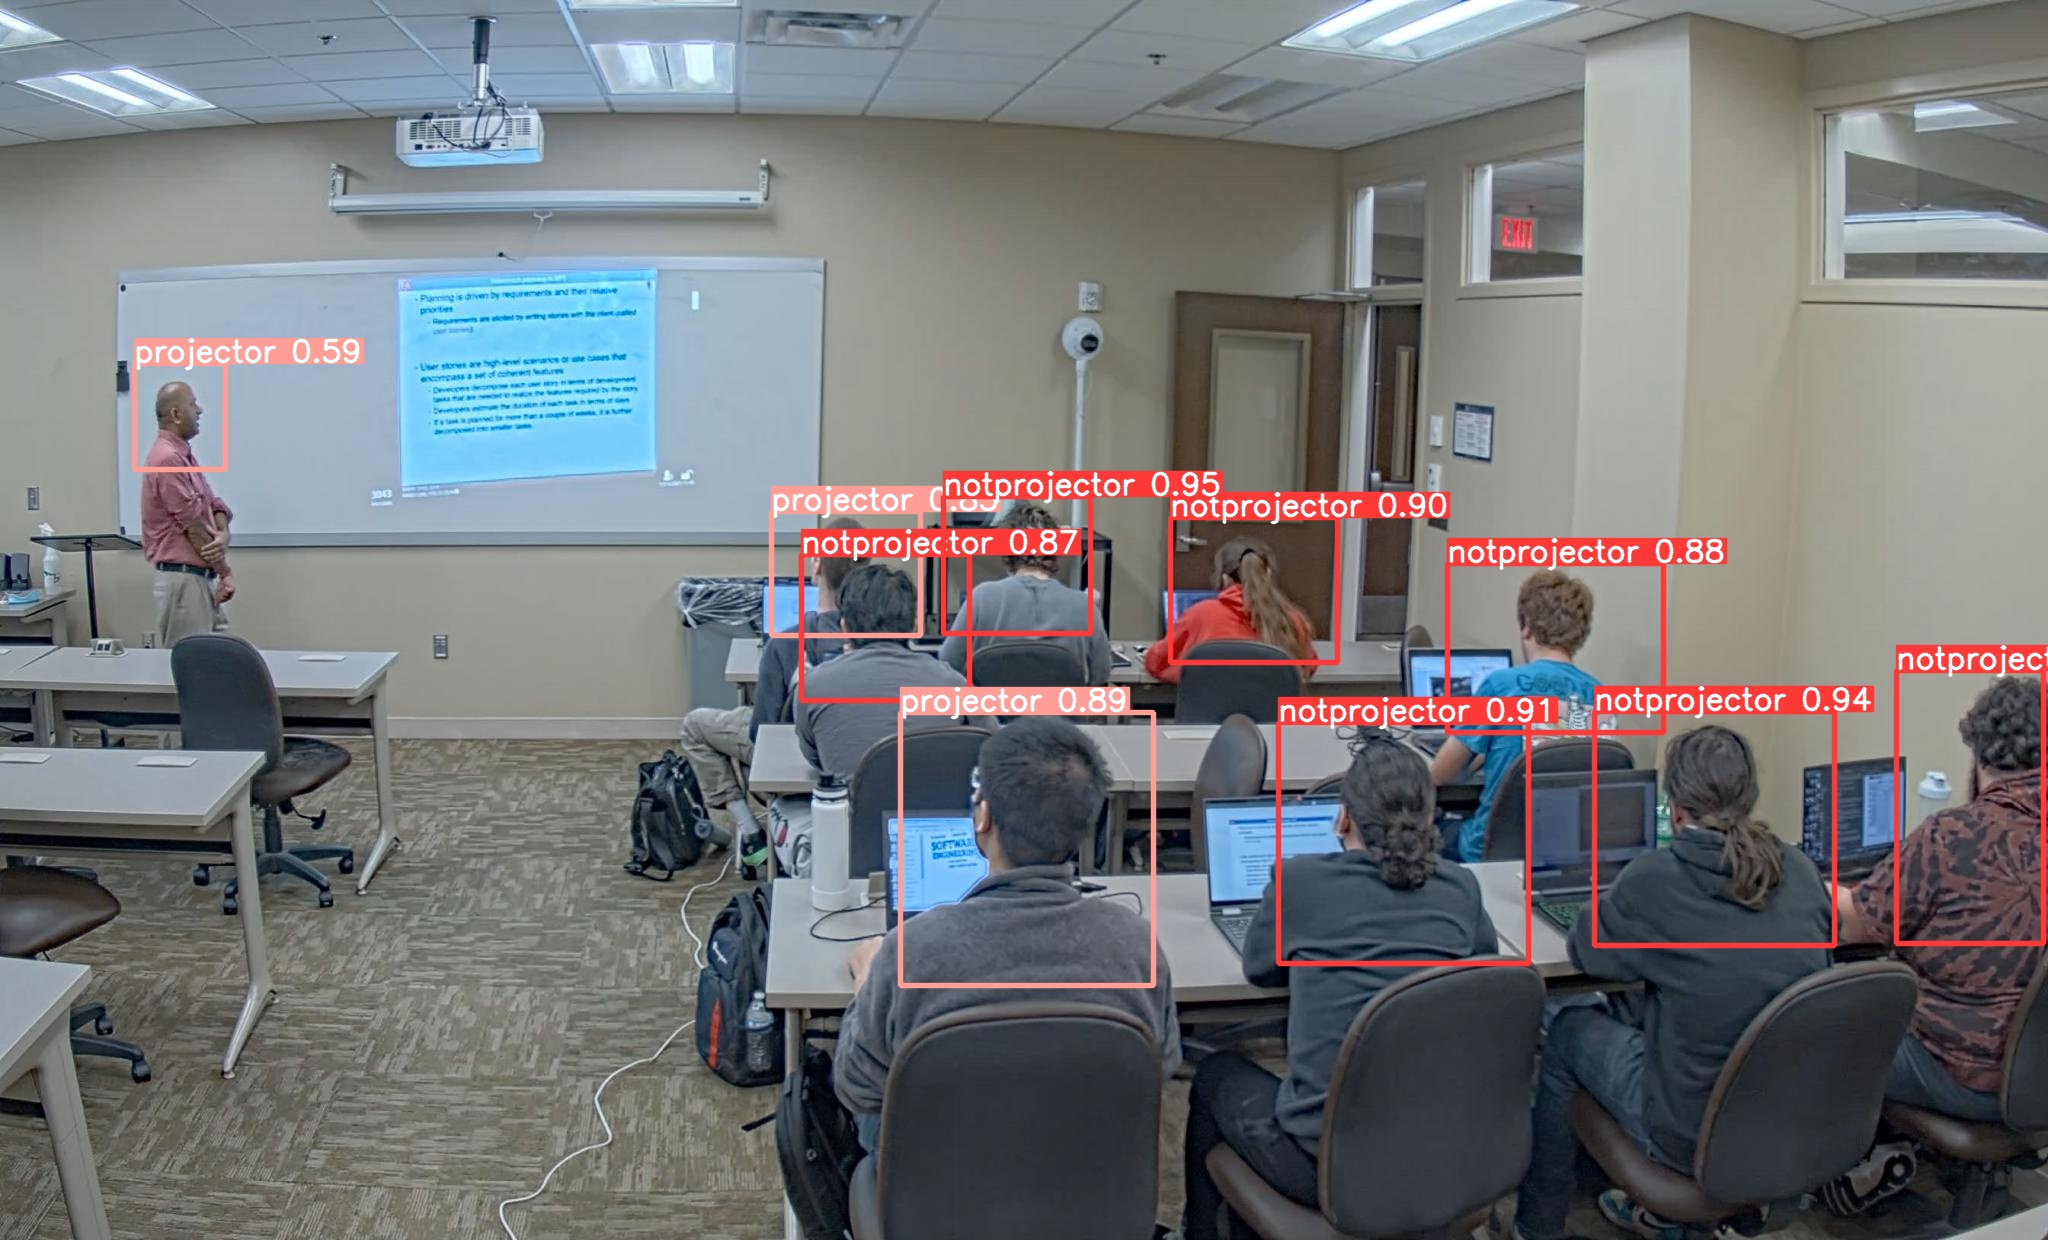

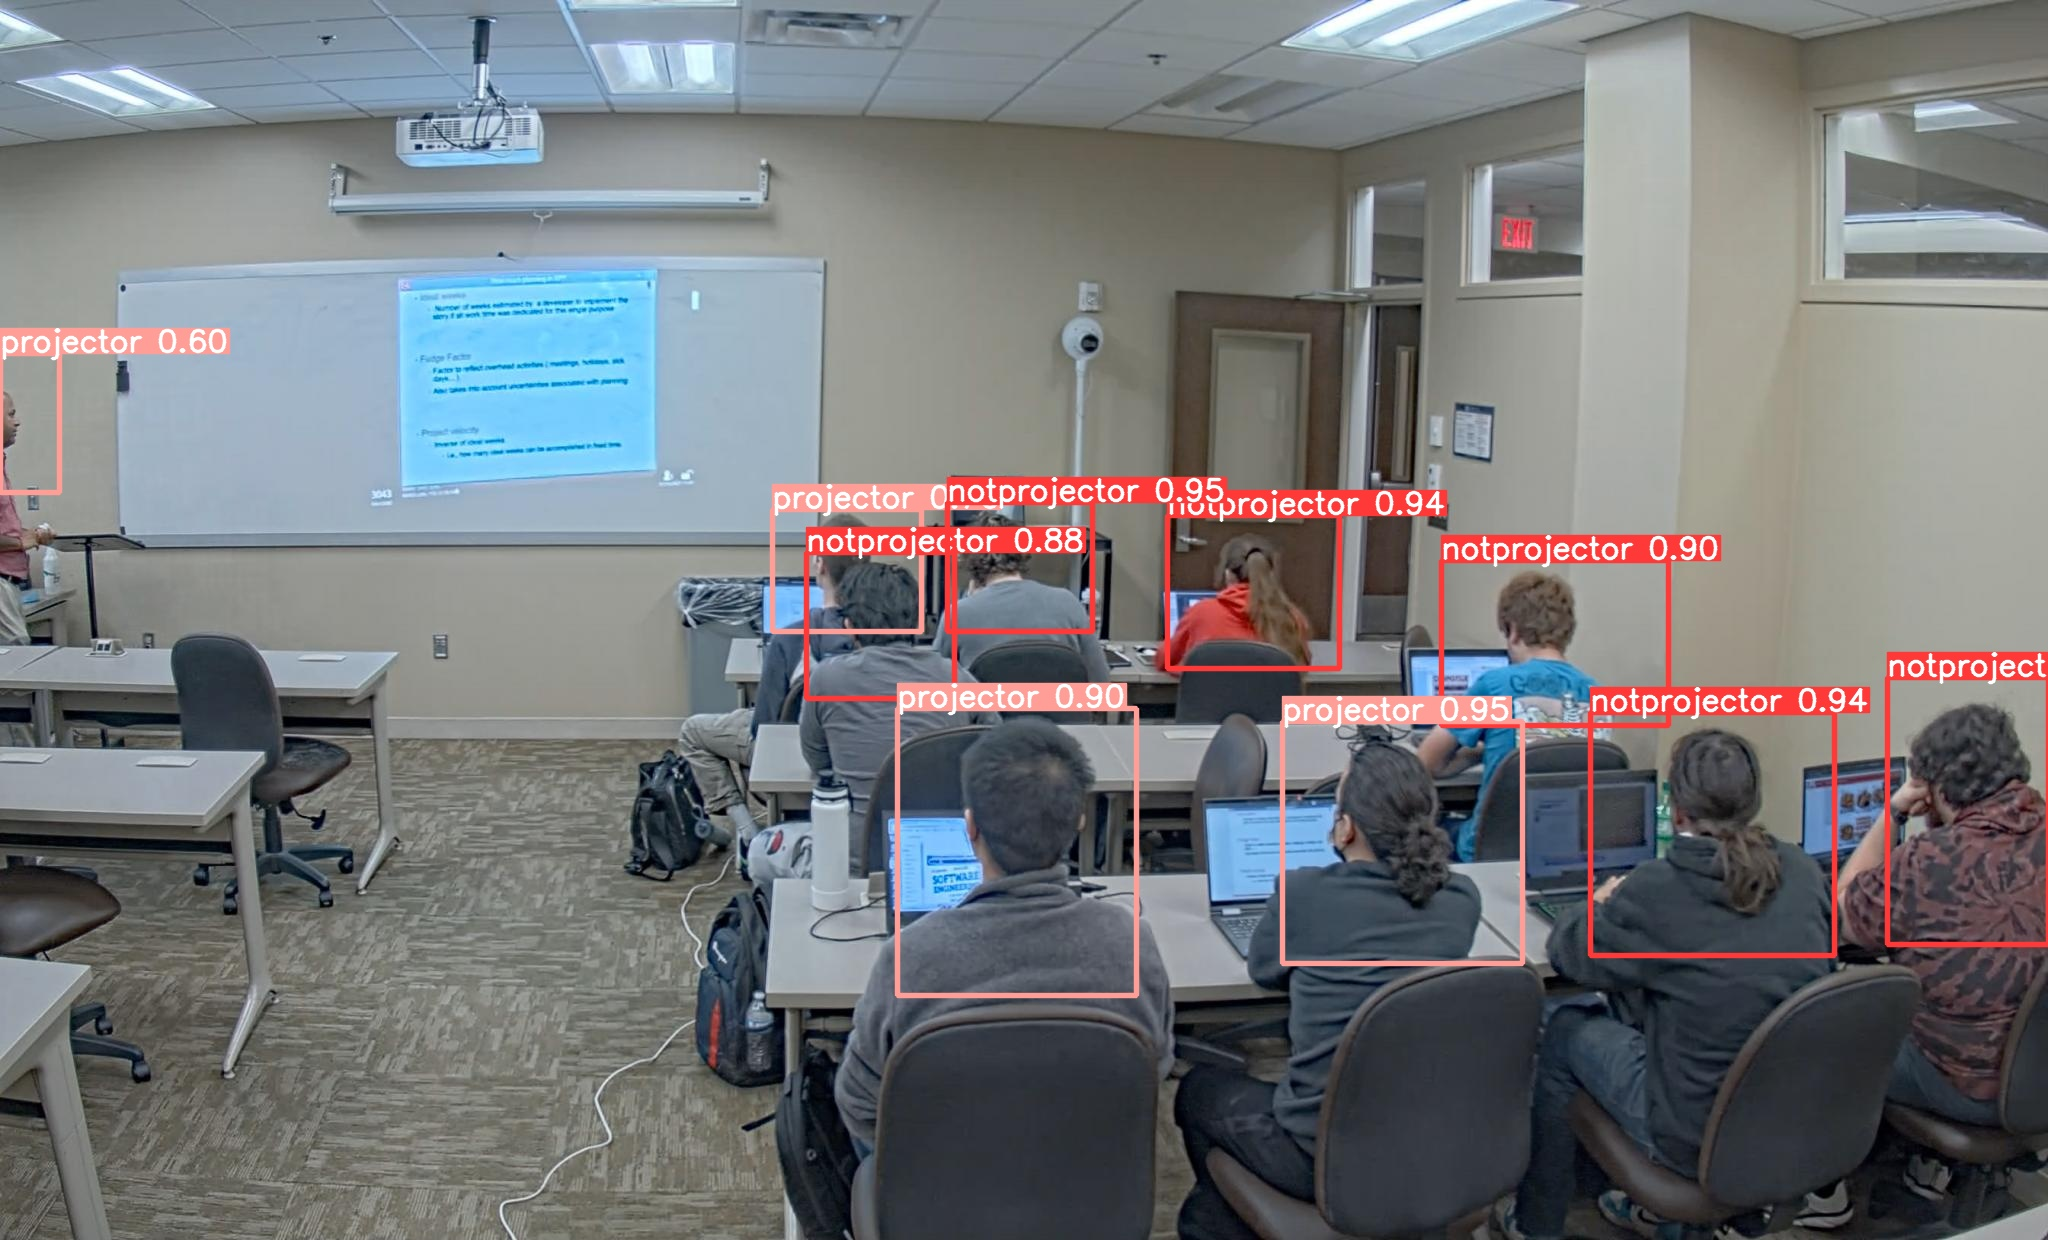

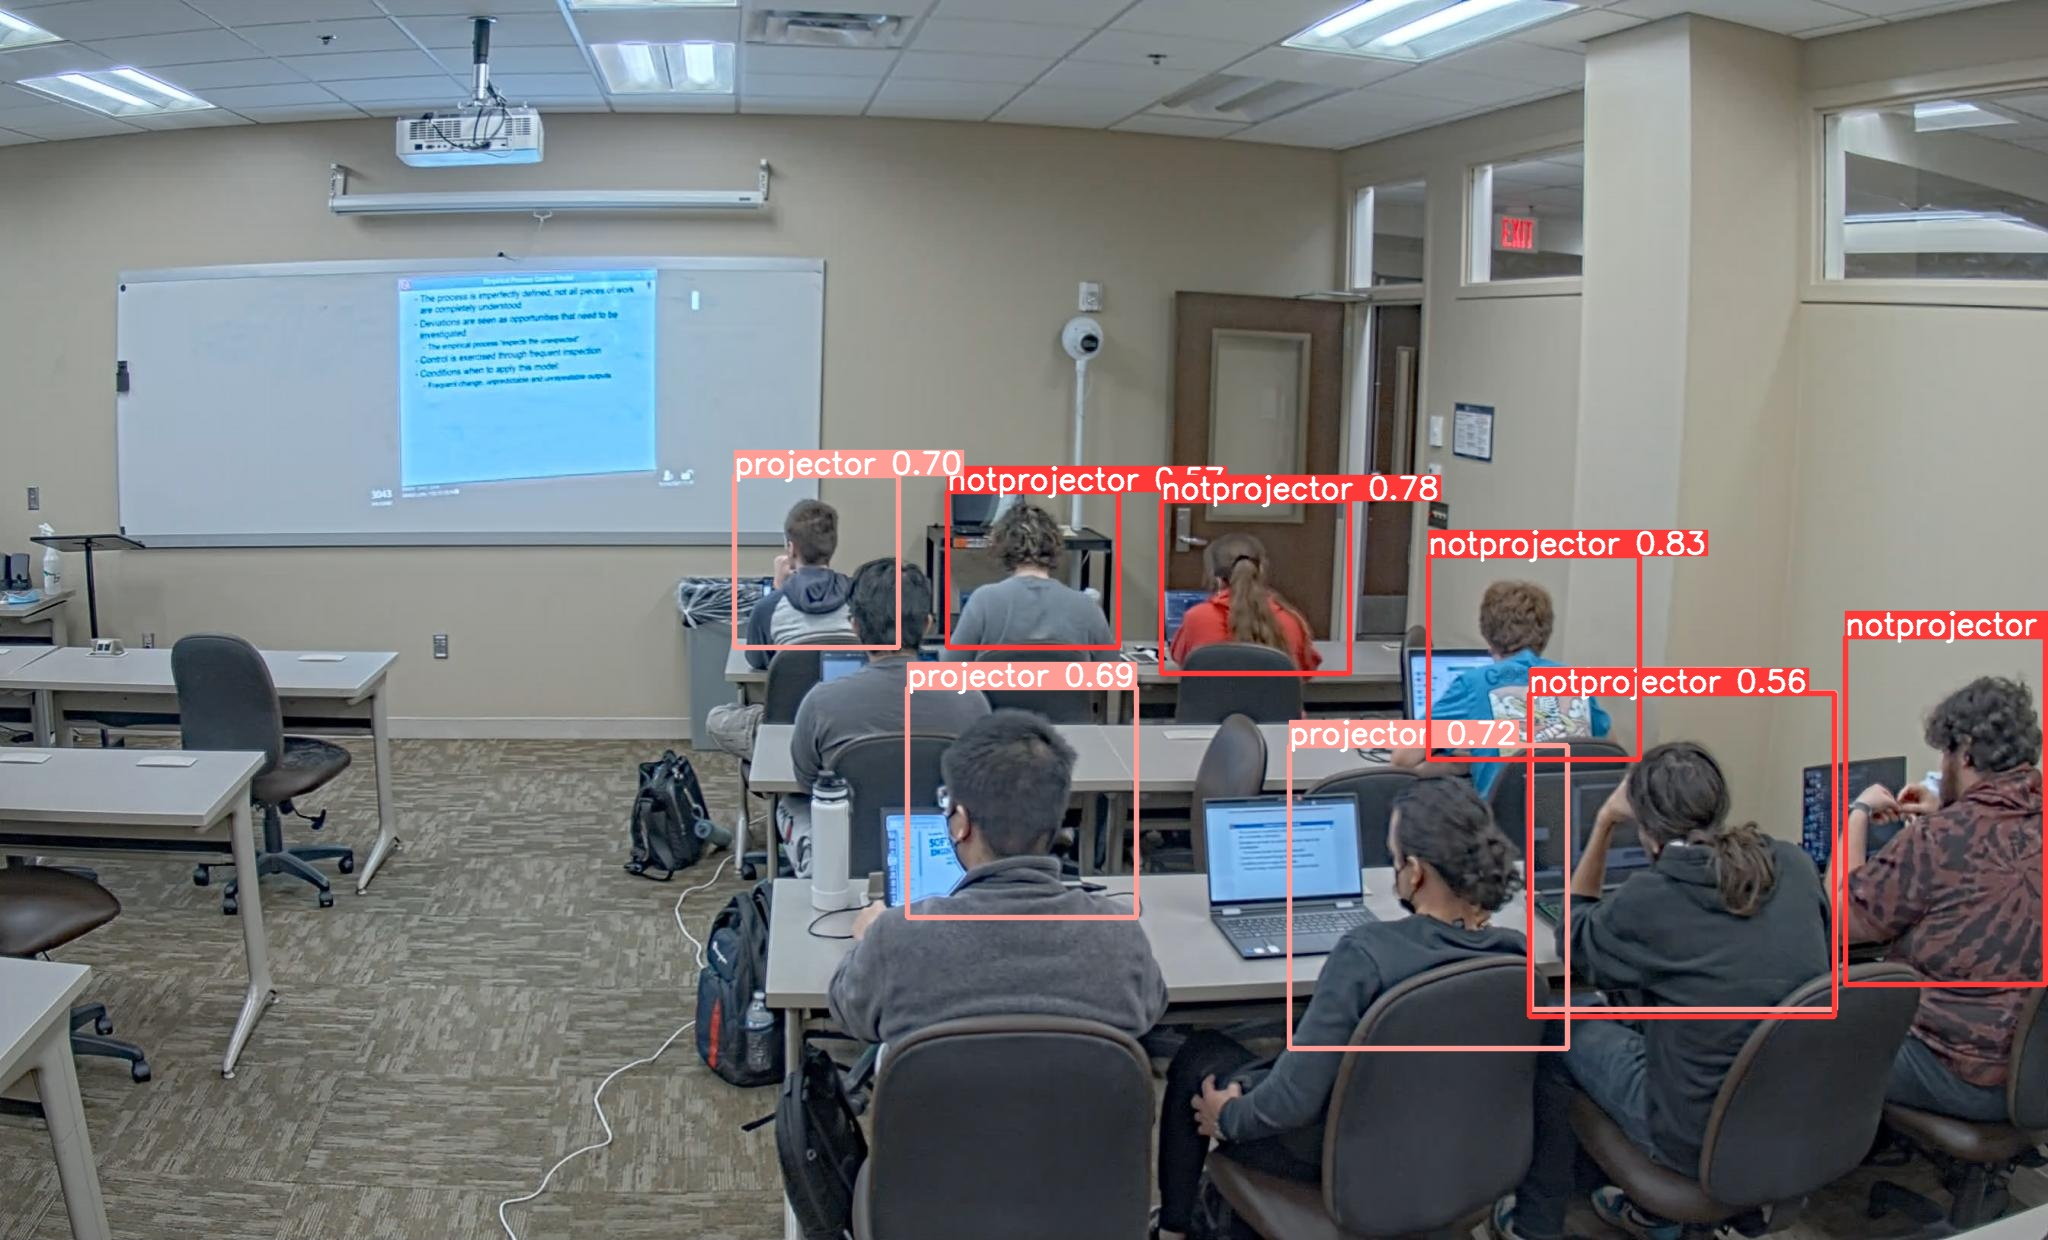

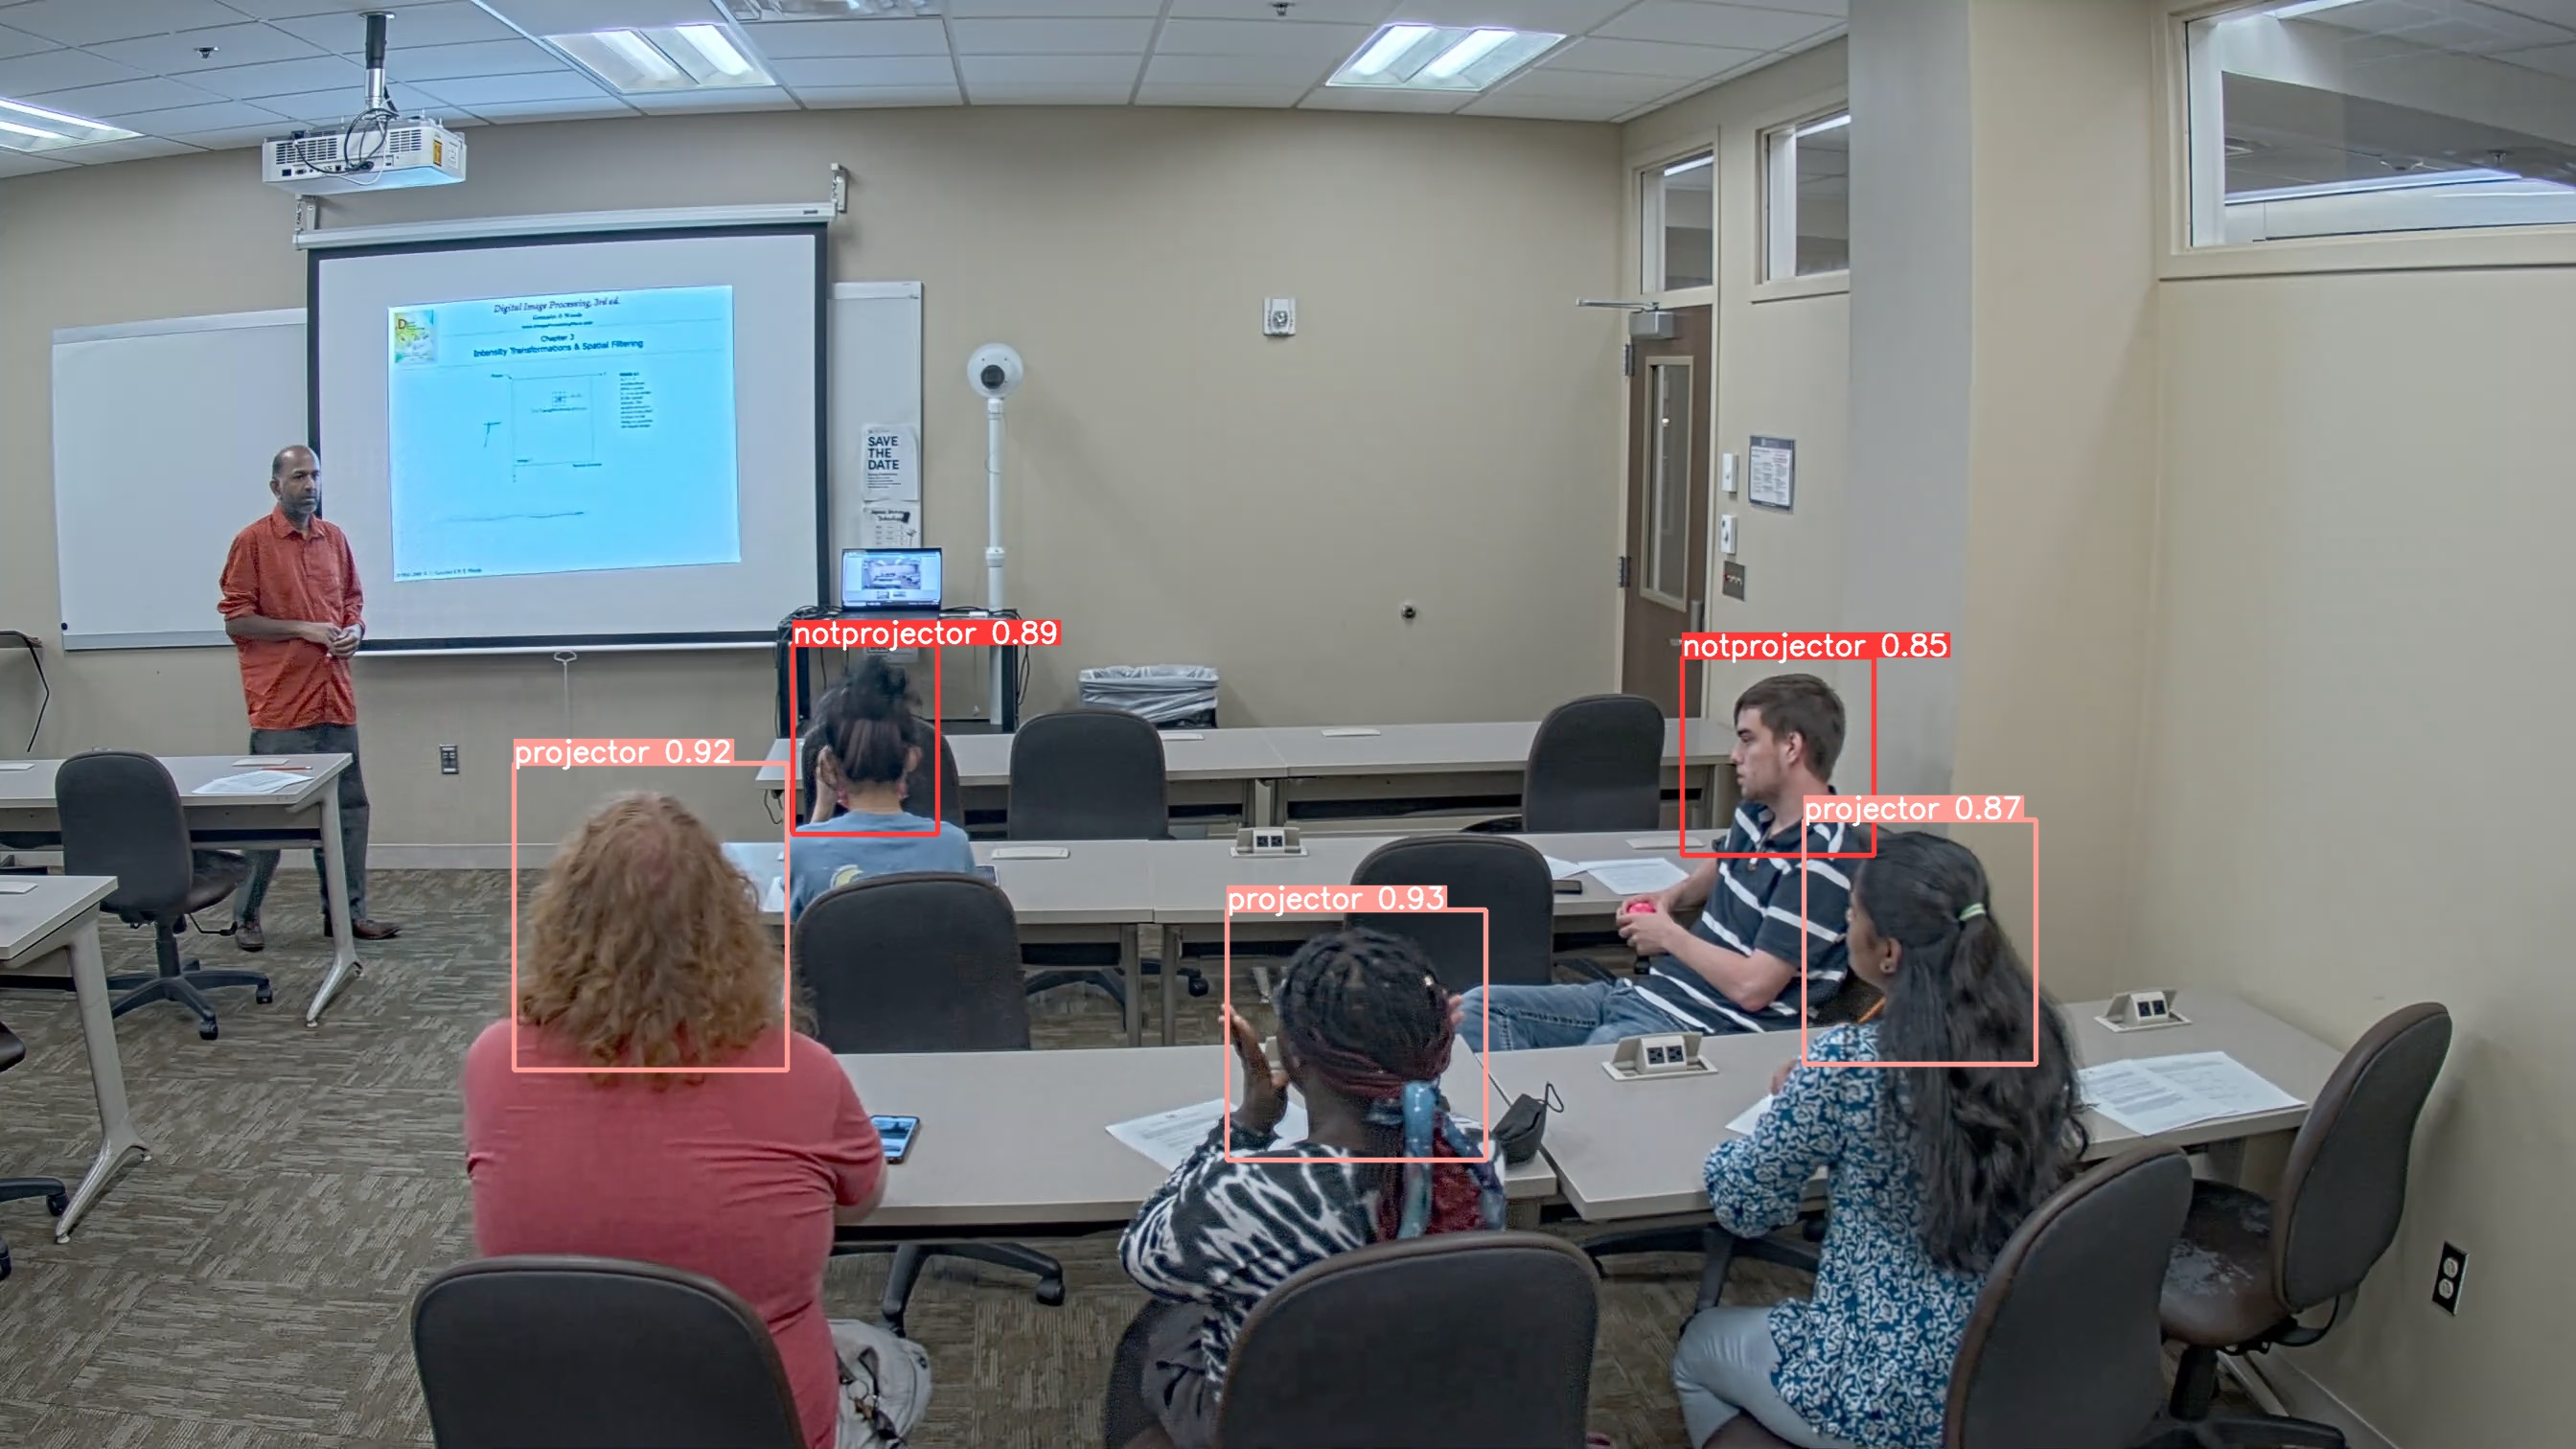

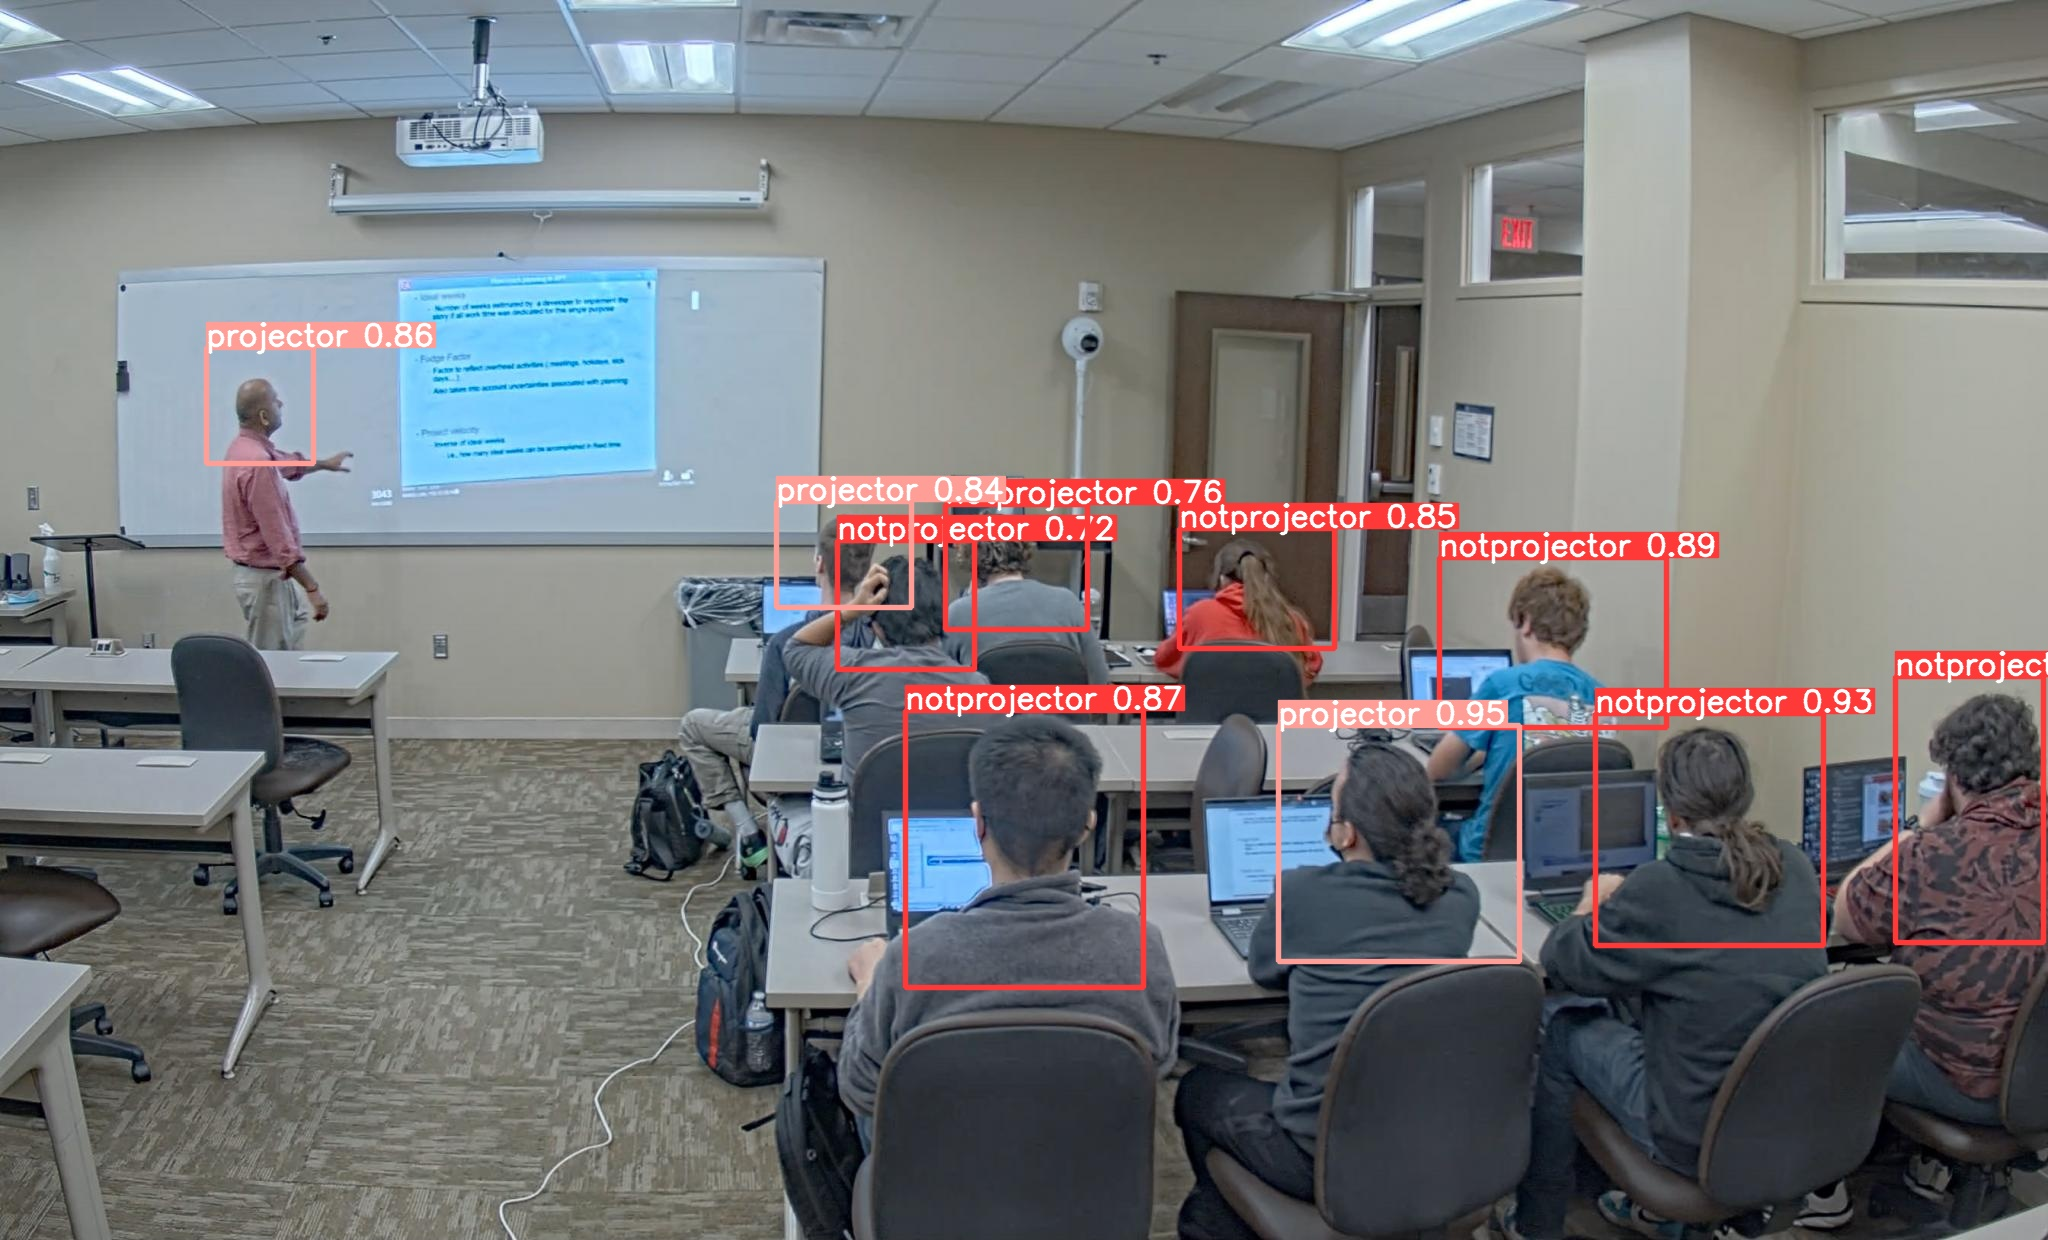

In [ ]:
import os

directory = '/content/yolov5/runs/detect/exp3'

for filename in os.listdir(directory):

    f = os.path.join(directory, filename)

    if os.path.isfile(f):

        display(Image(filename=f))
        print("\n")

In [ ]:
#display inference on ALL test images

# import glob
# from IPython.display import Image, display

# for imageName in glob.glob('/content/yolov5/runs/detect/exp/*'): #assuming JPG
#     display(Image(filename=imageName))
#     print("\n")

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>